# Natural Language Processing (NLP)

## Text Summarization 

## Objectives

On completing this assignment, students will be able to write a simple ai application that summarizes a given text by selecting a few most relevant sentences from the text.  

## Description
 
Write an AI application that will scrape a Wikipedia article from the Internet on a topic of your choice relating to AI. Then summarize the article by selecting a few most relevant sentences from the article.

### Additionally, do the following:

First, try out including sentences of different maximum lengths in doing the calculation. Then, select a maximum length that is suitable for your topic. 

Also, try including different number of sentences in the final summary. Then, decide on a number that is suitable for your topic.

Write a paragraph that briefly describes your experience and summarizes the results of carrying out the above experiment.
 
## Discussion

There are two ways to summarize an article. One way is to fully comprehend the article and then summarize it in your own words. This way we produce an abstract of the article. The second way is to extract from the article a few most relevant sentences and use them to constitute the summary. This type of summary is called an executive summary.

In this assignment, we have chosen the second approach of producing an executive summary of the article. 


## Title: NLP Web Scraping and Text Summarization

### Keith Yrisarri Stateson
July 18, 2024. Python 3.11.0

##### Summary
This program is an AI application designed to summarize a Wikipedia article - of my choice - by web scraping the content. The program uses Beautiful Soup to scrape and parse the article from the Internet, extracting the three most relevant sentences. 

Additionally, the program explores the impact of different maximum sentence lengths and varying the number of sentences in the summary to identify the best configuration for summarizing the text.

Assumptions
The program assumes that the most relevant sentences are those with the highest word frequency scores, and that the paragraphs are in the 'p' tag.

##### Overview
Import Libaries and Raw Data Collection
- Importing Libraries
- Scraping the Wikipedia Article

Data Cleaning
- Parsing HTML Content
- Cleaning and Formatting Text
- Removing Reference Numbers

Text Analysis

Text Tokenization and Word Frequency Analysis

Text Analysis

Word Frequency Calculation
- Creating a Word Frequency Dictionary
- Normalizing Word Frequencies

Sentence Scoring and Selection
- Calculating Sentence Scores
- Filtering Sentences by Length
- Selecting Top Sentences

Conclusion

## Import Libraries and Raw Data Collection

In [164]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/keithstateson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
import bs4 as bs
import urllib.request
raw_data = urllib.request.urlopen ('https://en.wikipedia.org/wiki/Association_football')
print(f'First few characters of the raw data: {raw_data.read(250)}')

document=raw_data.read()
print(f'\nFirst few characters of the document: {document[:250]}')

First few characters of the raw data: b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpr'

First few characters of the document: b'ef-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clien'


## Data Cleaning

In [166]:
parsed_document = bs.BeautifulSoup(document, 'lxml')
print(f'First few characters of the parsed document:\n {parsed_document.text[:500]}')

article_paras=parsed_document.find_all ('p')  # article_paras is a list of all the paragraphs in the article
print (f'\nFirst two paragraphs:\n {article_paras[:2]}')

First few characters of the parsed document:
 er":true,"wgULSisLanguageSelectorEmpty":false,"wgWikibaseItemId":"Q2736","wgCheckUserClientHintsHeadersJsApi":["architecture","bitness","brands","fullVersionList","mobile","model","platform","platformVersion"],"GEHomepageSuggestedEditsEnableTopics":true,"wgGETopicsMatchModeEnabled":false,"wgGEStructuredTaskRejectionReasonTextInputEnabled":false,"wgGELevelingUpEnabledForUser":false};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","user.styles":"ready","ext.globalCssJs.user":"

First two paragraphs:
 [<p>er":true,"wgULSisLanguageSelectorEmpty":false,"wgWikibaseItemId":"Q2736","wgCheckUserClientHintsHeadersJsApi":["architecture","bitness","brands","fullVersionList","mobile","model","platform","platformVersion"],"GEHomepageSuggestedEditsEnableTopics":true,"wgGETopicsMatchModeEnabled":false,"wgGEStructuredTaskRejectionReasonTextInputEnabled":false,"wgGELevelingUpEnabledForUser":false};RLSTATE={"ext.globalCssJs.user.styles":"

In [167]:
scrapped_data=""
for para in article_paras:
    scrapped_data += para.text
print(f'Show the first few characters of the scrapped data:\n {scrapped_data[:500]}')

Show the first few characters of the scrapped data:
 er":true,"wgULSisLanguageSelectorEmpty":false,"wgWikibaseItemId":"Q2736","wgCheckUserClientHintsHeadersJsApi":["architecture","bitness","brands","fullVersionList","mobile","model","platform","platformVersion"],"GEHomepageSuggestedEditsEnableTopics":true,"wgGETopicsMatchModeEnabled":false,"wgGEStructuredTaskRejectionReasonTextInputEnabled":false,"wgGELevelingUpEnabledForUser":false};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","user.styles":"ready","ext.globalCssJs.user":"


In [168]:
import re
scrapped_data = re.sub (r'\[[0-9]*\]', ' ', scrapped_data)  # remove the reference numbers, *\ means any number of digits
scrapped_data = re.sub (r'\s+', ' ', scrapped_data)
# remove brackets e.g., [b]
scrapped_data = re.sub(r'\[.*?\]', ' ', scrapped_data)  # .*? means any character, any number of times, but as few as possible

print(scrapped_data[:500])

er":true,"wgULSisLanguageSelectorEmpty":false,"wgWikibaseItemId":"Q2736","wgCheckUserClientHintsHeadersJsApi": ,"GEHomepageSuggestedEditsEnableTopics":true,"wgGETopicsMatchModeEnabled":false,"wgGEStructuredTaskRejectionReasonTextInputEnabled":false,"wgGELevelingUpEnabledForUser":false};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","user.styles":"ready","ext.globalCssJs.user":"ready","user":"ready","user.options":"loading","ext.cite.styles":"ready","ext.tmh.player.styles":"


## Text Tokenization

In [169]:
from nltk import sent_tokenize
all_sentences = sent_tokenize (scrapped_data)
print (all_sentences[:50])

['er":true,"wgULSisLanguageSelectorEmpty":false,"wgWikibaseItemId":"Q2736","wgCheckUserClientHintsHeadersJsApi": ,"GEHomepageSuggestedEditsEnableTopics":true,"wgGETopicsMatchModeEnabled":false,"wgGEStructuredTaskRejectionReasonTextInputEnabled":false,"wgGELevelingUpEnabledForUser":false};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","user.styles":"ready","ext.globalCssJs.user":"ready","user":"ready","user.options":"loading","ext.cite.styles":"ready","ext.tmh.player.styles":"ready", "skins.vector.search.codex.styles":"ready","skins.vector.styles":"ready","skins.vector.icons":"ready","jquery.makeCollapsible.styles":"ready","ext.wikimediamessages.styles":"ready","ext.visualEditor.desktopArticleTarget.noscript":"ready","ext.uls.interlanguage":"ready","wikibase.client.init":"ready","ext.wikimediaBadges":"ready"};RLPAGEMODULES= ; Association football, more commonly known as football or soccer,  is a team sport played between two teams of 11 players each, who primarily 

## Text Analysis

In [170]:
# Analyze word count, sentence count, average word length, and average sentence length
# all_sentences is tokenized into words but scrapped_data is not yet formatted

print(f'Total number of words: {len(scrapped_data.split())}')
print(f'Total number of sentences: {len(all_sentences)}')
print(f'Average length of words: {sum(len(word) for word in scrapped_data.split()) / len(scrapped_data.split()):.1f} characters')
print(f'Average sentence length: {len(scrapped_data) / len(all_sentences):.1f} characters')

print(f'Average words per sentence: {len(formatted_text.split()) / len(all_sentences):.1f} words')

Total number of words: 6948
Total number of sentences: 296
Average length of words: 5.2 characters
Average sentence length: 145.3 characters
Average words per sentence: 23.6 words


In [171]:
sentence_length = [len(sent.split()) for sent in all_sentences]
length_distribution = nltk.FreqDist(sentence_length)

print("\nSentence Length Distribution:")
for length, count in sorted(length_distribution.items()):
    print(f"Length {length}: {count} sentences")


Sentence Length Distribution:
Length 3: 2 sentences
Length 5: 1 sentences
Length 7: 4 sentences
Length 8: 3 sentences
Length 9: 12 sentences
Length 10: 8 sentences
Length 11: 10 sentences
Length 12: 5 sentences
Length 13: 9 sentences
Length 14: 12 sentences
Length 15: 11 sentences
Length 16: 8 sentences
Length 17: 8 sentences
Length 18: 18 sentences
Length 19: 12 sentences
Length 20: 9 sentences
Length 21: 6 sentences
Length 22: 15 sentences
Length 23: 12 sentences
Length 24: 10 sentences
Length 25: 7 sentences
Length 26: 8 sentences
Length 27: 12 sentences
Length 28: 3 sentences
Length 29: 8 sentences
Length 30: 6 sentences
Length 31: 8 sentences
Length 32: 10 sentences
Length 33: 11 sentences
Length 34: 9 sentences
Length 35: 1 sentences
Length 36: 3 sentences
Length 37: 3 sentences
Length 38: 6 sentences
Length 39: 2 sentences
Length 40: 3 sentences
Length 41: 6 sentences
Length 42: 2 sentences
Length 45: 2 sentences
Length 46: 2 sentences
Length 48: 2 sentences
Length 50: 2 senten

In [172]:
print("\nSentences shorter than 15 words:")
count = 0
for sent in all_sentences:
    if len(sent.split()) < 15:
        print(sent)
        count += 1
        if count == 10:
            break


Sentences shorter than 15 words:
Internationally, association football is governed by FIFA.
Under FIFA, there are six continental confederations: AFC, CAF, CONCACAF, CONMEBOL, OFC, and UEFA.
Of these confederations, CONMEBOL is the oldest one, being founded in 1916.
National associations (e.g.
Kicking ball games arose independently multiple times across multiple cultures.
FIFA cites Cuju as the earliest form of football.
Cuju and other ancient games demonstrate humanity’s innate predisposition to play with a ball.
Kemari originated after the year 600 during the Asuka period.
Phaininda and episkyros were Greek ball games.
Athenaeus, writing in 228 CE, mentions the Roman ball game harpastum.


In [186]:
print("\nSentences between 15 and 30 words:")
count = 0
for sent in all_sentences:
    if 15 <= len(sent.split(' ')) < 30:
        print(sent)
        count += 1
        if count == 10:
            break


Sentences between 15 and 30 words:
Traditionally, the game has been played over two 45-minute halves, for a total match time of 90 minutes.
With an estimated 250 million players active in over 200 countries and territories, it is the world's most popular sport.
The game is played with a football that is 68–70 cm (27–28 in) in circumference.
The two teams compete to get the ball into the other team's goal (between the posts, under the bar, and across the goal line), thereby scoring a goal.
Only the goalkeepers may use their hands and arms, and only then within the penalty area.
The team that has scored more goals at the end of the game is the winner.
There are situations where a goal can be disallowed, such as an offside call or a foul in the build-up to the goal.
The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Women's World Cup.
The men's World Cup is the most-viewed sporting event in the world, surpassing the Olympic Games.
The two most 

## Text Tokenization and Word Frequency Analysis

In [174]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

scrapped_data = re.sub ('[^a-zA-Z]', ' ', scrapped_data)  # remove all characters except alphabets
formatted_text = re.sub (r'\s+', ' ', scrapped_data)
print(f'formatted_text:\n{formatted_text[:500]}\n')

word_freq = {}
for word in word_tokenize (formatted_text):  # word_tokenize will split text e.g., formatted_text into words and return a list of words
    if word not in stopwords.words('english'):
        if word not in word_freq.keys():
            word_freq [word] = 1
        else:
            word_freq [word] += 1

# print (word_freq)

# Print the first 10 key-value pairs in the word_freq dictionary. Can use itertools, which provides better performance for large dictionaries
print('First 10 key-value pairs in the word_freq dictionary:')
for i, (word, freq) in enumerate(word_freq.items()):
    if i < 10:
        print(f"{word}: {freq}")
    else:
        break

formatted_text:
er true wgULSisLanguageSelectorEmpty false wgWikibaseItemId Q wgCheckUserClientHintsHeadersJsApi GEHomepageSuggestedEditsEnableTopics true wgGETopicsMatchModeEnabled false wgGEStructuredTaskRejectionReasonTextInputEnabled false wgGELevelingUpEnabledForUser false RLSTATE ext globalCssJs user styles ready site styles ready user styles ready ext globalCssJs user ready user ready user options loading ext cite styles ready ext tmh player styles ready skins vector search codex styles ready skins vecto

First 10 key-value pairs in the word_freq dictionary:
er: 2
true: 3
wgULSisLanguageSelectorEmpty: 1
false: 4
wgWikibaseItemId: 1
Q: 1
wgCheckUserClientHintsHeadersJsApi: 1
GEHomepageSuggestedEditsEnableTopics: 1
wgGETopicsMatchModeEnabled: 1
wgGEStructuredTaskRejectionReasonTextInputEnabled: 1


## Text Analysis

In [175]:
# Text Analysis again after removing stopwords
# Analyze word count, sentence count, average word length, and average sentence length

print(f'Total number of words: {len(formatted_text.split())}')
print(f'Total number of sentences: {len(all_sentences)}')
print(f'Average length of words: {sum(len(word) for word in formatted_text.split()) / len(formatted_text.split()):.1f} characters')
print(f'Average sentence length: {len(formatted_text) / len(all_sentences):.1f} characters')

print(f'Average words per sentence: {len(formatted_text.split()) / len(all_sentences):.1f} words')

Total number of words: 6984
Total number of sentences: 296
Average length of words: 4.9 characters
Average sentence length: 139.1 characters
Average words per sentence: 23.6 words


In [176]:
sentence_length = [len(sent.split()) for sent in all_sentences]
length_distribution = nltk.FreqDist(sentence_length)

print("\nSentence Length Distribution:")
for length, count in sorted(length_distribution.items()):
    print(f"Length {length}: {count} sentences")


Sentence Length Distribution:
Length 3: 2 sentences
Length 5: 1 sentences
Length 7: 4 sentences
Length 8: 3 sentences
Length 9: 12 sentences
Length 10: 8 sentences
Length 11: 10 sentences
Length 12: 5 sentences
Length 13: 9 sentences
Length 14: 12 sentences
Length 15: 11 sentences
Length 16: 8 sentences
Length 17: 8 sentences
Length 18: 18 sentences
Length 19: 12 sentences
Length 20: 9 sentences
Length 21: 6 sentences
Length 22: 15 sentences
Length 23: 12 sentences
Length 24: 10 sentences
Length 25: 7 sentences
Length 26: 8 sentences
Length 27: 12 sentences
Length 28: 3 sentences
Length 29: 8 sentences
Length 30: 6 sentences
Length 31: 8 sentences
Length 32: 10 sentences
Length 33: 11 sentences
Length 34: 9 sentences
Length 35: 1 sentences
Length 36: 3 sentences
Length 37: 3 sentences
Length 38: 6 sentences
Length 39: 2 sentences
Length 40: 3 sentences
Length 41: 6 sentences
Length 42: 2 sentences
Length 45: 2 sentences
Length 46: 2 sentences
Length 48: 2 sentences
Length 50: 2 senten


Sentence Length Distribution:
Length 3: 2 sentences
Length 5: 1 sentences
Length 7: 4 sentences
Length 8: 3 sentences
Length 9: 12 sentences
Length 10: 8 sentences
Length 11: 10 sentences
Length 12: 5 sentences
Length 13: 9 sentences
Length 14: 12 sentences
Length 15: 11 sentences
Length 16: 8 sentences
Length 17: 8 sentences
Length 18: 18 sentences
Length 19: 12 sentences
Length 20: 9 sentences
Length 21: 6 sentences
Length 22: 15 sentences
Length 23: 12 sentences
Length 24: 10 sentences
Length 25: 7 sentences
Length 26: 8 sentences
Length 27: 12 sentences
Length 28: 3 sentences
Length 29: 8 sentences
Length 30: 6 sentences
Length 31: 8 sentences
Length 32: 10 sentences
Length 33: 11 sentences
Length 34: 9 sentences
Length 35: 1 sentences
Length 36: 3 sentences
Length 37: 3 sentences
Length 38: 6 sentences
Length 39: 2 sentences
Length 40: 3 sentences
Length 41: 6 sentences
Length 42: 2 sentences
Length 45: 2 sentences
Length 46: 2 sentences
Length 48: 2 sentences
Length 50: 2 senten

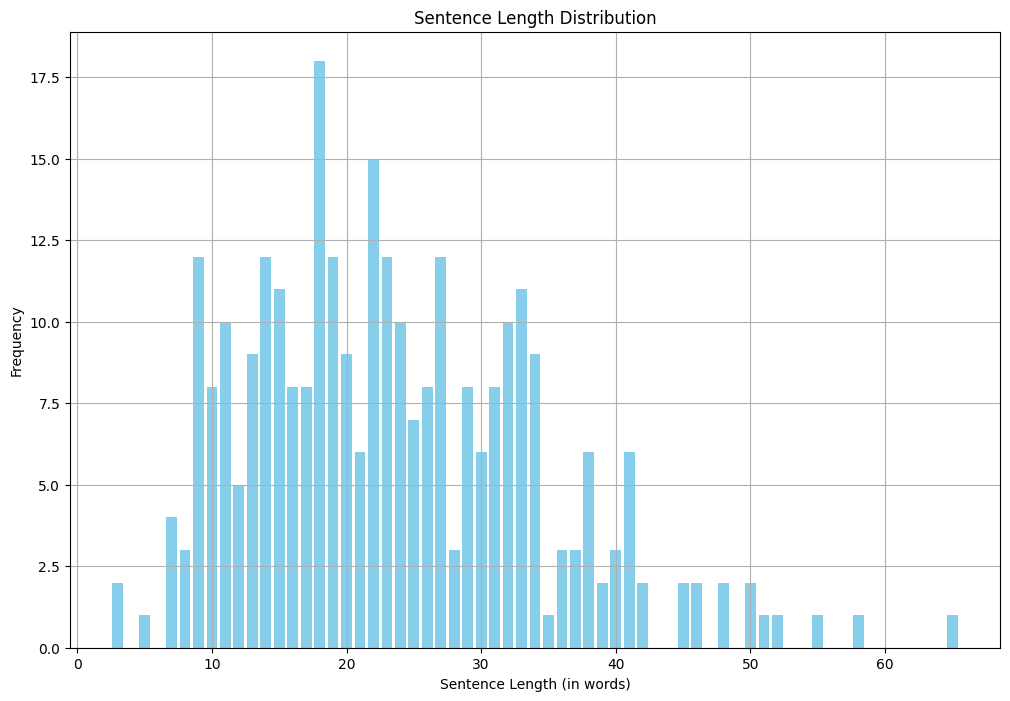

In [177]:
import matplotlib.pyplot as plt
import nltk

# Calculate the sentence length distribution
sentence_length = [len(sent.split()) for sent in all_sentences]
length_distribution = nltk.FreqDist(sentence_length)

# Print the sentence length distribution
print("\nSentence Length Distribution:")
for length, count in sorted(length_distribution.items()):
    print(f"Length {length}: {count} sentences")

# Plotting the distribution
plt.figure(figsize=(12, 8))
plt.bar(length_distribution.keys(), length_distribution.values(), color='skyblue')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution')
plt.grid(True)
plt.show()

In [187]:
print("\nSentences shorter than 15 words:")
count = 0
for sent in all_sentences:
    if len(sent.split(' ')) < 15:
        print(sent)
        count += 1
        if count == 10:
            break


Sentences shorter than 15 words:
Internationally, association football is governed by FIFA.
Under FIFA, there are six continental confederations: AFC, CAF, CONCACAF, CONMEBOL, OFC, and UEFA.
Of these confederations, CONMEBOL is the oldest one, being founded in 1916.
National associations (e.g.
Kicking ball games arose independently multiple times across multiple cultures.
FIFA cites Cuju as the earliest form of football.
Cuju and other ancient games demonstrate humanity’s innate predisposition to play with a ball.
Kemari originated after the year 600 during the Asuka period.
Phaininda and episkyros were Greek ball games.
Athenaeus, writing in 228 CE, mentions the Roman ball game harpastum.


In [188]:
print("\nSentences between 15 and 30 words:")
count = 0
for sent in all_sentences:
    if 15 <= len(sent.split(' ')) < 30:
        print(sent)
        count += 1
        if count == 10:
            break


Sentences between 15 and 30 words:
Traditionally, the game has been played over two 45-minute halves, for a total match time of 90 minutes.
With an estimated 250 million players active in over 200 countries and territories, it is the world's most popular sport.
The game is played with a football that is 68–70 cm (27–28 in) in circumference.
The two teams compete to get the ball into the other team's goal (between the posts, under the bar, and across the goal line), thereby scoring a goal.
Only the goalkeepers may use their hands and arms, and only then within the penalty area.
The team that has scored more goals at the end of the game is the winner.
There are situations where a goal can be disallowed, such as an offside call or a foul in the build-up to the goal.
The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Women's World Cup.
The men's World Cup is the most-viewed sporting event in the world, surpassing the Olympic Games.
The two most 

## Word Frequency Calculation

In [180]:
max_freq=max(word_freq.values())
for word in word_freq.keys():
    word_freq [word]= word_freq [word] / max_freq

# print (word_freq)

print('First 10 key-value pairs in the word_freq dictionary after normalization:')
for i, (word, freq) in enumerate(word_freq.items()):
    if i < 10:
        print(f"{word}: {freq}")
    else:
        break

First 10 key-value pairs in the word_freq dictionary after normalization:
er: 0.020833333333333332
true: 0.03125
wgULSisLanguageSelectorEmpty: 0.010416666666666666
false: 0.041666666666666664
wgWikibaseItemId: 0.010416666666666666
Q: 0.010416666666666666
wgCheckUserClientHintsHeadersJsApi: 0.010416666666666666
GEHomepageSuggestedEditsEnableTopics: 0.010416666666666666
wgGETopicsMatchModeEnabled: 0.010416666666666666
wgGEStructuredTaskRejectionReasonTextInputEnabled: 0.010416666666666666


## Sentence Scoring and Selection

In [190]:
sent_scores = {}
for sent in all_sentences:
    if len (sent.split(' ')) < 25:
        for word in word_tokenize (sent):
            if word in word_freq.keys():            
                if sent in sent_scores.keys():
                    sent_scores [sent] += word_freq [word]
                else:
                    sent_scores [sent] = word_freq [word]

# print (sent_scores)

print('key-value pairs in the sent_scores dictionary:')
count = 0
for i, (sent, score) in enumerate(sent_scores.items()):
    if i < 100:
        print(f"{sent}: {score}")
        count += 1
        if count == 15:
            break
    else:
        break

key-value pairs in the sent_scores dictionary:
Traditionally, the game has been played over two 45-minute halves, for a total match time of 90 minutes.: 1.6249999999999998
With an estimated 250 million players active in over 200 countries and territories, it is the world's most popular sport.: 0.9791666666666666
The game is played with a football that is 68–70 cm (27–28 in) in circumference.: 2.71875
Only the goalkeepers may use their hands and arms, and only then within the penalty area.: 1.0104166666666665
The team that has scored more goals at the end of the game is the winner.: 2.3854166666666665
There are situations where a goal can be disallowed, such as an offside call or a foul in the build-up to the goal.: 0.71875
Internationally, association football is governed by FIFA.: 1.4062500000000002
Under FIFA, there are six continental confederations: AFC, CAF, CONCACAF, CONMEBOL, OFC, and UEFA.: 0.8333333333333335
Of these confederations, CONMEBOL is the oldest one, being founded in

In [182]:
# Select the top 7 sentences based on the scores
import heapq
selected_sentences = heapq.nlargest(7, sent_scores, key=sent_scores.get)

for sentence in selected_sentences:
    print(sentence)

The game is played using a spherical ball of 68–70 cm (27–28 in) circumference, known as the football (or soccer ball).
The Chinese competitive game cuju (蹴鞠, literally "kick ball"; also known as tsu chu) resembles modern association football.
The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Women's World Cup.
Association football is one of a family of football codes that emerged from various ball games played worldwide since antiquity.
The major international competition in football is the World Cup, organised by FIFA.
Under the Laws, the two basic states of play during a game are ball in play and ball out of play.
The teams finishing at the top of a country's league may also be eligible to play in international club competitions in the following season.


In [183]:
# Enhance NLP Text Summarization with TF-IDF and Cosine Similarity
# Given the top 7 sentences, identify the target setences manually

# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents. Here, we calcualte the TF-IDF vectors for the sentences and target sentences using scikit-learn. Then we calculate the cosine similarity between the sentences and target sentences to determine the relevance of each sentence. The sentences with higher cosine similarity scores are considered more relevant to the target sentences.

# Steps:
# Define the top sentences from caluclated scores
# Define the target sentences or keywords for relevance
# Calculate the TF-IDF vectors for the sentences and target sentences
# Calculate the cosine similarity between the sentences and target sentences
# Determine the relevance of each sentence based on the cosine similarity
# Sort the sentences by relevance and output the relevant sentences

from sklearn.metrics.pairwise import cosine_similarity

# Define the top sentences from caluclated scores
sentences = [
    'The game is played using a spherical ball of 68–70 cm (27–28 in) circumference, known as the football (or soccer ball).',
    'The Chinese competitive game cuju (蹴鞠, literally "kick ball"; also known as tsu chu) resembles modern association football.',
    'The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Womens World Cup.',
    'Association football is one of a family of football codes that emerged from various ball games played worldwide since antiquity.',
    'The major international competition in football is the World Cup, organised by FIFA.',
    'Under the Laws, the two basic states of play during a game are ball in play and ball out of play.',
    'The teams finishing at the top of a countrys league may also be eligible to play in international club competitions in the following season.'
]

# Define target sentences or keywords for relevance, manually selected
target_sentences = [
    "The game is played using a spherical ball",
    "FIFA World Cup",
    "association football codes",
    "World Cup organised by FIFA",
    "international club competitions"
]

# Calculate TF-IDF vectors
vectorizer = TfidfVectorizer().fit_transform(sentences + target_sentences)
vectors = vectorizer.toarray()

# Calculate cosine similarity
cosine_similarities = cosine_similarity(vectors[:len(sentences)], vectors[len(sentences):])

# Determine the relevance of each sentence
relevance_threshold = 0.1
relevant_sentences = []

for idx, sentence in enumerate(sentences):
    max_similarity = max(cosine_similarities[idx])
    if max_similarity >= relevance_threshold:
        relevant_sentences.append((sentence, max_similarity))

# Sort sentences by relevance
relevant_sentences = sorted(relevant_sentences, key=lambda x: x[1], reverse=True)

# Output relevant sentences
print("Relevant sentences:")
for sentence, score in relevant_sentences:
    print(f"Score: {score:.2f} - Sentence: {sentence}")

Relevant sentences:
Score: 0.61 - Sentence: The major international competition in football is the World Cup, organised by FIFA.
Score: 0.58 - Sentence: The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Womens World Cup.
Score: 0.56 - Sentence: The game is played using a spherical ball of 68–70 cm (27–28 in) circumference, known as the football (or soccer ball).
Score: 0.40 - Sentence: Association football is one of a family of football codes that emerged from various ball games played worldwide since antiquity.
Score: 0.30 - Sentence: The teams finishing at the top of a countrys league may also be eligible to play in international club competitions in the following season.
Score: 0.20 - Sentence: Under the Laws, the two basic states of play during a game are ball in play and ball out of play.
Score: 0.19 - Sentence: The Chinese competitive game cuju (蹴鞠, literally "kick ball"; also known as tsu chu) resembles modern association football.


Cosine Similarity

Range of Values
- 1: Indicates that the two vectors are identical.
- 0: Indicates that the two vectors are orthogonal (i.e., they have no similarity).
- -1: Indicates that the two vectors are diametrically opposite.

Normalization: Cosine similarity is useful in text analysis because it is independent of the magnitude of the vectors, focusing purely on their direction. This means that it measures the relative proportion of terms rather than their absolute counts.

In [184]:
# select top 5 sentences based on the relevance score
selected_sentences = [sentence for sentence, score in relevant_sentences[:5]]
selected_summary = " ".join(selected_sentences)
for sent in selected_sentences:
    print(sent)

The major international competition in football is the World Cup, organised by FIFA.
The most senior and prestigious international competitions are the FIFA World Cup and the FIFA Womens World Cup.
The game is played using a spherical ball of 68–70 cm (27–28 in) circumference, known as the football (or soccer ball).
Association football is one of a family of football codes that emerged from various ball games played worldwide since antiquity.
The teams finishing at the top of a countrys league may also be eligible to play in international club competitions in the following season.


## Conclusion

In [185]:
# Summary of this cell is to extract the top 5 sentences based on the relevance scores calculated using TF-IDF vectorization and cosine similarity.
# With the purpose of summarizing the text document based on the relevance of the sentences to the target sentences or keywords.
# The TF-IDF vectors are calculated for the sentences and target sentences, and the cosine similarity is calculated between them.
# The relevance of each sentence is determined based on the cosine similarity, and the relevant sentences are sorted by relevance.
# The top 5 relevant sentences are selected to form the summary of the text document.